In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('data/is24_89737_1530561783410.csv', index_col=0, encoding='utf-8', engine='python')[['address_city',
    'address_quarter',
    'address_postcode',
    'address_wgs84Coordinate_latitude',
    'address_wgs84Coordinate_longitude',
    'balcony',
    'builtInKitchen',
    'calculatedPrice_marketingType',
    'calculatedPrice_priceIntervalType',
    'calculatedPrice_rentScope',
    'calculatedPrice_value',
    'energyPerformanceCertificate',
    'floorplan',
    'garden',
    'livingSpace',
    'numberOfRooms',
    'price_value',
    'privateOffer']]

In [3]:
df['pricePerMeterSquared'] = df.calculatedPrice_value / df.livingSpace

In [4]:
filtered_df = df[(df.livingSpace < 90) &
   (df.calculatedPrice_value < 900) &
   (df.address_city.str.contains('Berlin'))]
len(filtered_df)

1128

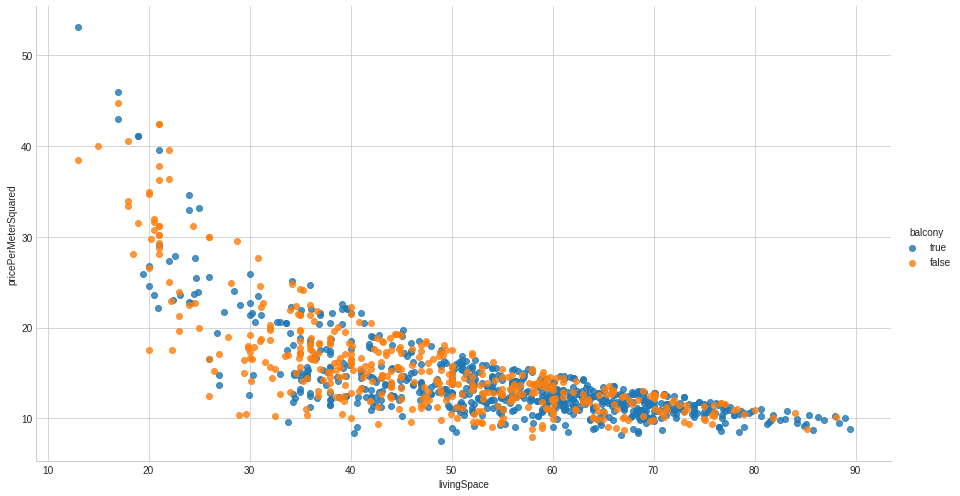

In [5]:
sns.lmplot('livingSpace',
           'pricePerMeterSquared',
           data=filtered_df,
           fit_reg=False,
           hue='balcony',
           size=7,
           aspect=1.8);

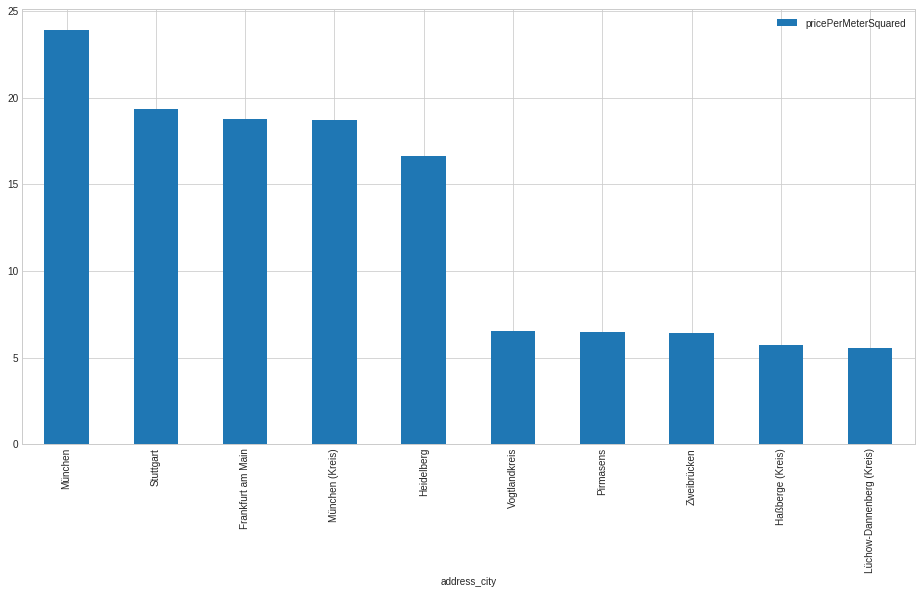

In [6]:
avg_df = df.groupby('address_city').median()
avg_df = avg_df[['pricePerMeterSquared']].sort_values(by=['pricePerMeterSquared'], ascending=False)
avg_df[:5].append(avg_df[-5:]).plot.bar(figsize=(16, 8));

In [7]:
df.head()

,address_city,address_quarter,address_postcode,address_wgs84Coordinate_latitude,address_wgs84Coordinate_longitude,balcony,builtInKitchen,calculatedPrice_marketingType,calculatedPrice_priceIntervalType,calculatedPrice_rentScope,calculatedPrice_value,energyPerformanceCertificate,floorplan,garden,livingSpace,numberOfRooms,price_value,privateOffer,pricePerMeterSquared
@id,,,,,,,,,,,,,,,,,,,
103714113,Magdeburg,Werder,39114.0,52.13008,11.65215,true,false,BUDGET_RENT,MONTH,WARM_RENT,1275.15,NaN,true,false,100.00,3.0,1025.15,false,12.751500
91645737,Magdeburg,Altstadt,39104.0,52.13484,11.64833,true,false,BUDGET_RENT,MONTH,WARM_RENT,2082.65,true,true,false,148.65,4.0,1700.00,false,14.010427
105292933,Erfurt,Löbervorstadt,99096.0,50.96571,11.03207,false,false,BUDGET_RENT,MONTH,WARM_RENT,683.00,true,true,false,63.33,2.0,538.00,false,10.784778
105248601,Berlin,Köpenick (Köpenick),12557.0,52.43243,13.57142,true,true,BUDGET_RENT,MONTH,WARM_RENT,809.90,true,false,false,78.00,3.0,626.00,false,10.383333
105623436,Bremerhaven,Wulsdorf,27572.0,53.50972,8.59401,true,true,BUDGET_RENT,MONTH,WARM_RENT,535.00,true,false,false,59.09,2.0,355.00,false,9.053985


In [13]:
berlin_df = df[(df.address_city.notnull()) & (df.address_city.str.contains('Berlin'))]
avg_berlin_df = berlin_df.groupby('address_quarter').median()
avg_berlin_df = avg_berlin_df[['pricePerMeterSquared']].sort_values(by=['pricePerMeterSquared'], ascending=False)
avg_berlin_df.rename(columns={'pricePerMeterSquared': 'pricePerMeterSquared_avg'}, inplace=True)
avg_berlin_5_5 = avg_berlin_df[:5].append(avg_berlin_df[-5:])

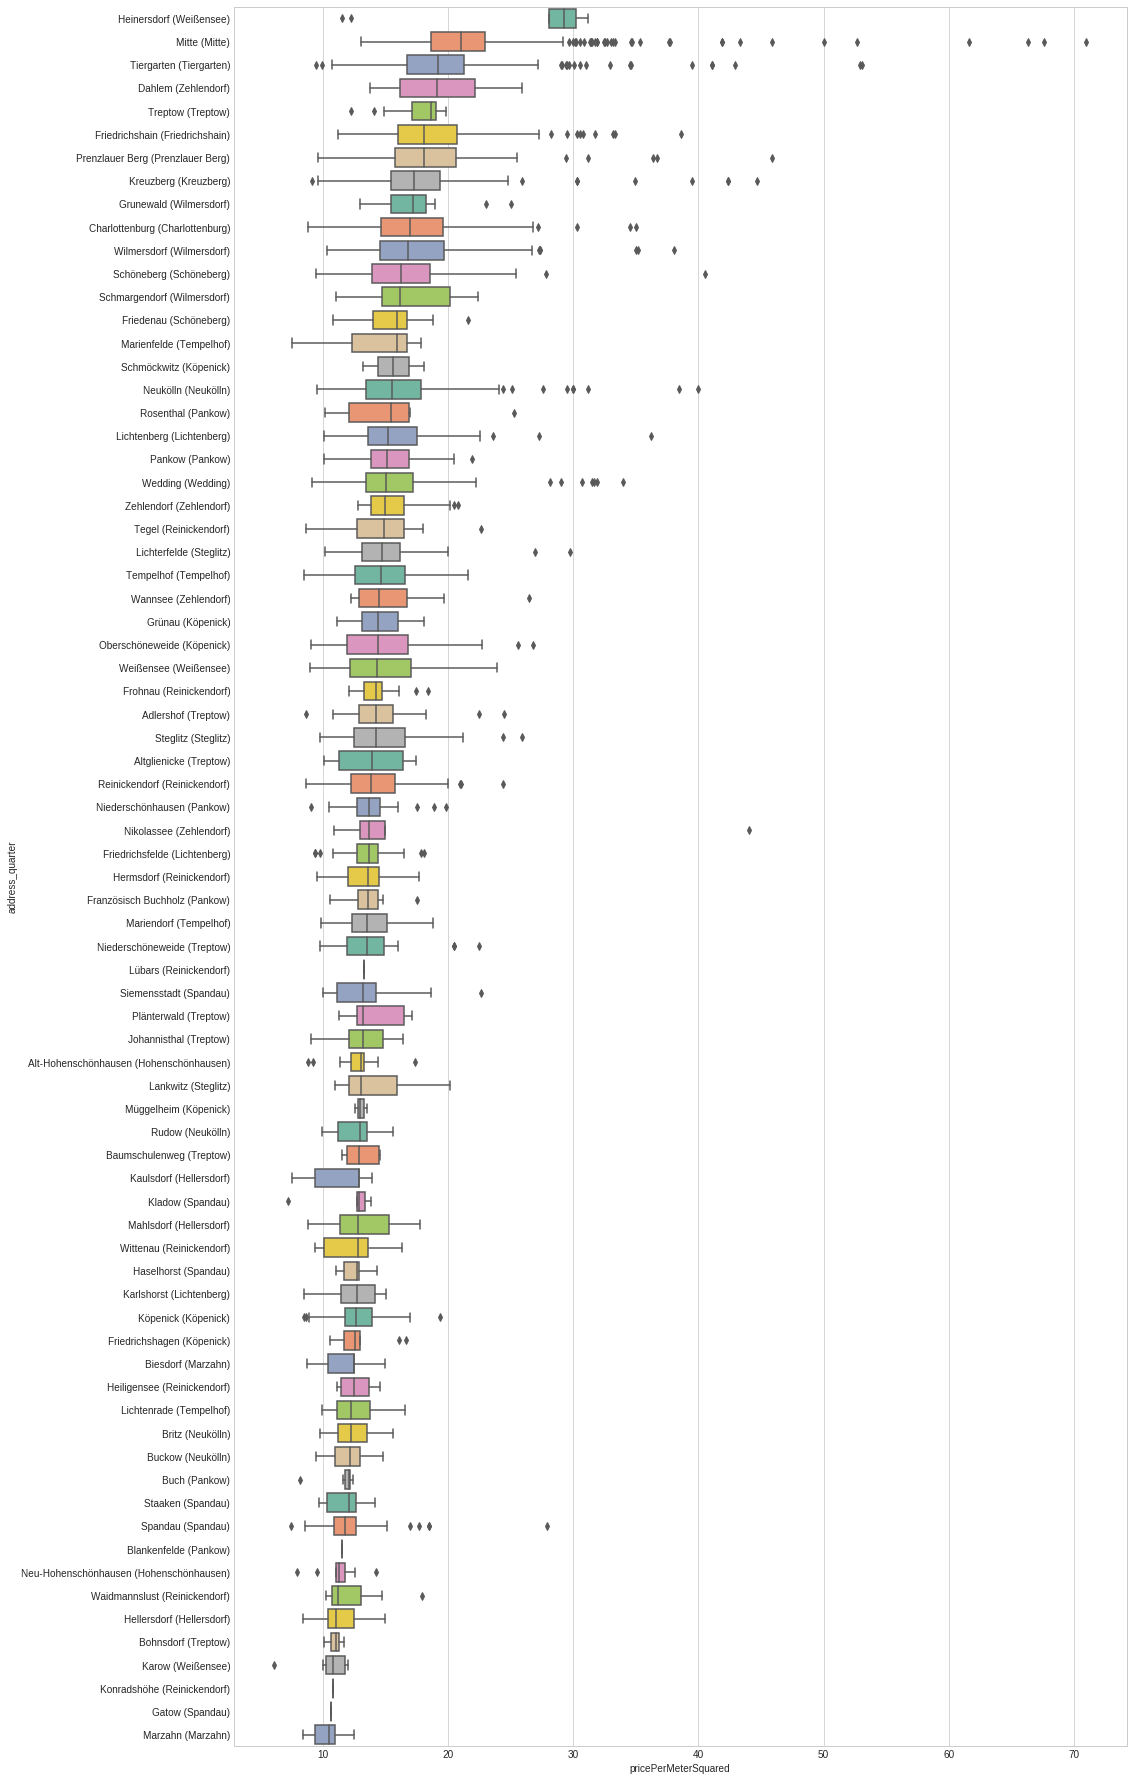

In [25]:
berlin_5_5 = berlin_df.join(avg_berlin_5_5, on='address_quarter', how='inner')
plt.figure(figsize=(16, 32))
sns_plot = sns.boxplot(x='pricePerMeterSquared',
                       y='address_quarter',
                       data=berlin_df[berlin_df.pricePerMeterSquared < 100],
                       palette="Set2",
                       order=avg_berlin_df.index,
                       orient='h');

In [28]:
#sns_plot.get_figure().savefig("address_querter_boxplot.png", pad_inches=0.5, bbox_inches='tight')

In [33]:
avg_berlin_df[avg_berlin_df.index.str.contains('Treptow')]

,pricePerMeterSquared_avg
address_quarter,
Treptow (Treptow),18.620690
Adlershof (Treptow),14.280952
Altglienicke (Treptow),13.888889
Niederschöneweide (Treptow),13.487424
Plänterwald (Treptow),13.187452
Johannisthal (Treptow),13.187028
Baumschulenweg (Treptow),12.891147
Bohnsdorf (Treptow),11.041176
